<div style="text-align: right"> <b>Autor:</b> Michał Bieroński, 218324</div>

### Wykorzystane narzędzie

Wykorzystanym narzędzie jest notatnik jupyter. Językiem programowania jest język python wspierany przez następujące biblioteki:
 - numpy (obliczenia)
 - pandas (manipulacja danymi)
 - matplolib i seaborn (wykresy)

### Informacja na temat wybranych danych

Zbiór danych powiązanych z kampanią marketingową portugalskiej instytucji bankowej. Kampania przeprowadzona została telefonicznie. Często konieczne było nawiązanie wielu kontaktów z klientem w celu uzyskania odpowiedzi na temat subskrypcji depozytu bankowego.

#### Źródło: 
Dane pochodzą z repozytorium: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

#### Cechy:
   1. age (numeric)
   2. job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services") 
   3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4. education (categorical: "unknown","secondary","primary","tertiary")
   5. default: has credit in default? (binary: "yes","no")
   6. balance: average yearly balance, in euros (numeric) 
   7. housing: has housing loan? (binary: "yes","no")
   8. loan: has personal loan? (binary: "yes","no")
   9. contact: contact communication type (categorical: "unknown","telephone","cellular")
   10. day: last contact day of the month (numeric)
   11. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
   12. duration: last contact duration, in seconds (numeric)
   13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
   14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
   15. previous: number of contacts performed before this campaign and for this client (numeric)
   16. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
bank = pd.read_csv('bank.csv', sep=';')
bank.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

Skupimy się na osobach pracujących w dziale usług.

In [3]:
services = bank[bank['job'] == 'services']

### Podstawowe statystyki

Zacznijmy od wszystkich podstawowych statystyk dla atrybutów numerycznych. Do tych miar należą:
 - liczba wystąpień
 - średnia
 - odchylenie standardowe
 - minimum
 - wybrane percentyle
 - maksimum
 

In [4]:
services.describe()

age       balance         day     duration    campaign  \
count  417.000000    417.000000  417.000000   417.000000  417.000000   
mean    38.570743   1103.956835   15.515588   262.486811    2.822542   
std      9.207825   2445.239976    8.125836   259.997440    3.222095   
min     21.000000  -1202.000000    1.000000     5.000000    1.000000   
25%     31.000000     33.000000    8.000000   101.000000    1.000000   
50%     37.000000    288.000000   15.000000   185.000000    2.000000   
75%     46.000000   1210.000000   21.000000   329.000000    3.000000   
max     60.000000  26394.000000   31.000000  1971.000000   28.000000   

            pdays    previous  
count  417.000000  417.000000  
mean    36.371703    0.443645  
std    100.991377    1.515089  
min     -1.000000    0.000000  
25%     -1.000000    0.000000  
50%     -1.000000    0.000000  
75%     -1.000000    0.000000  
max    761.000000   15.000000

Po ilości wystąpień można zauważyć, że wszystkie rekordy są wypełnione.
Średni wiek osoby pracującej w usługach to 38.57 lat.
Odchylenie standardowe wieku wynosi 9.2 lat.
Najmłodszy pracownik pracujący w usługach ma 21 lat.
Przedstawione są także wybrane percentyle. Dla wieku 25% odpowiada 31 lat, 50% 37 lat i 75% 46 lat.
Maksymalny wiek pracownika w dziale usług to 60 lat.

Resztę miar cech numerycznych można odczytać podobnie.

Warto zauważyć, że wartość -1 w większości percentyli dla cechy pdays oznacza, że kontakt z klientem odbywał się po raz pierwszy dla większości z nich.

### Wykresy częstościowe
Zobaczmy jak wygląda liczba pracowników usług względem ich edukacji.

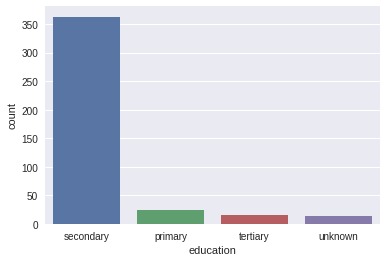

In [5]:
ax = sns.countplot(x="education", data=services)

A także względem ich statusu związku.

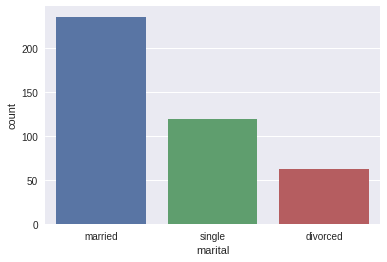

In [6]:
ax = sns.countplot(x="marital", data=services)

### Wykres punktowy i linia regresji

Spróbujmy zwizualizować jak wygląda skupienie pracowników usług zależnie od ich stanu konta i wieku. Dodatkowo kolorem zaznaczymy kolorami poziom ukończonej edukacji każdej z osób. Najpierw trzeba jednak odrzucić osoby o nienanym poziomie wykształcenia.

Funkcja może automatycznie narysować nam linie regresji, tak by łatwiej można było zaobserwować wpływ jednego parametru na drugi.

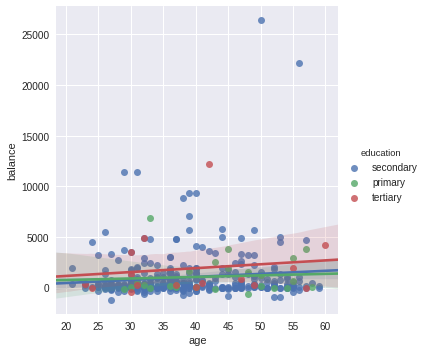

In [7]:
ax = sns.lmplot(x="age", y="balance", hue="education", data=services[services['education'] != 'unknown'])

Łatwo zauważyć, że największy przyrost stanu konta z wiekiem występuje wśród osób z wyższym wykształceniem. Dla osób o wykształceniu średnim i podstawowym przyrost ten jest znacznie niższy. Występują oczywiście odstępstwa takie jak np. osoby w o wykształceniu średnim i stanie konta powyżej 20 tysięcy w wieku około 50 lat, jednak ze względu na dużą liczbę osób w tych grupach obserwacje te nie zaburzają modelu regresji.

### Wykres punktowy i histogramy dla par

Narysujmy zestaw wykresów punktowych dla wszystkich par cech oraz histogramy dla nich samych. Następnie z takiego zestawienia można próbować wyciągnąć kilka wniosków.

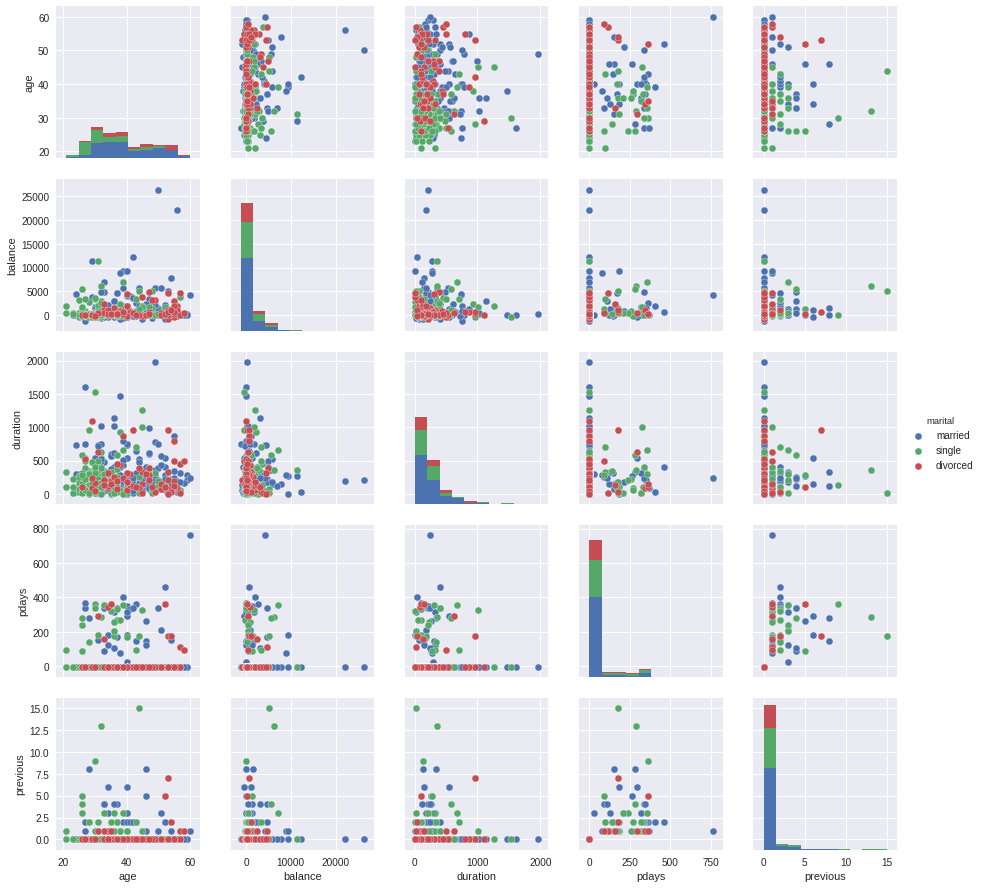

In [8]:
ax = sns.pairplot(services[['age', 'balance', 'duration', 'pdays', 'previous', 'marital']], hue="marital")

Można zaobserwować, że większość osób o niewielkim balansie konta oraz w miarę, krótkim czasie trwania rozmowy to osoby rozwiedzone. Można stąd wnioskować, że ich niecierpliwość mogła być powiązana z rozwodem.

Widoczna jest także pewna korelacja pomiędzy liczbą dni od ostatniego kontaktu podczas poprzedniej kampanii (pdays), a liczbą kontaktów wykonanych przed rozpoczęciem aktualnej kampanii.

Większość cech nie ma rozkładów gaussowskich (np. widoczny jest nierównomieny rozrzut stanu konta), jedynie wiek reprezentuje taki rozkład.

### Korelacja pomiędzy cechami

Obliczmy korelację pomiędzy parami cech numerycznych. Korelację można dobrze zwizualizować na mapie cieplnej.

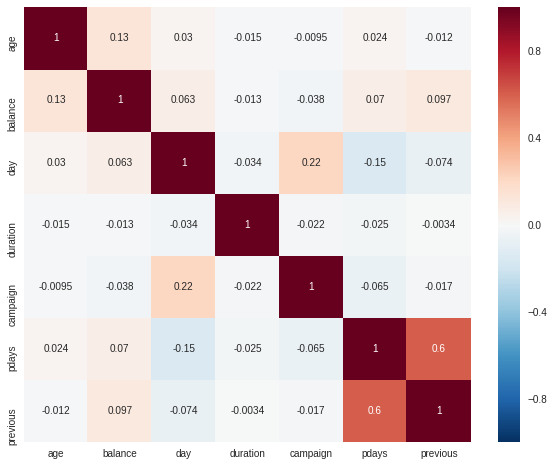

In [9]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(services.corr(), annot=True, ax=ax)

Tak jak poprzednio już zauważono występuje wysoka korelacja pomiędzy parametrami pdays i previous.

### Porównanie stanów kont ze względu na grupe

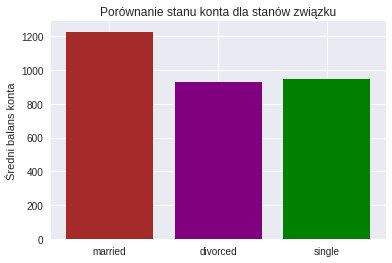

In [10]:
maritals = ['married', 'divorced', 'single']
stats = [np.mean(services[services['marital'] == status]['balance']) for status in maritals]

ax = plt.bar(np.arange(len(stats)), stats, tick_label=maritals, color=['brown', "purple", 'green'])
plt.ylabel("Średni balans konta")
_ = plt.title("Porównanie stanu konta dla stanów związku")

Powyższy wykres informuje o tym, że średnio największy stan konta posiadają osoby żonate. Samotne i rozwiedzione posiadają zbliżone wartości. Tłumaczyć to może fakt wspólnoty majątkowej dla małżeństw.

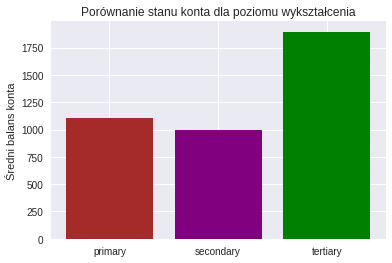

In [11]:
educations = ['primary', 'secondary', 'tertiary']
stats = [np.mean(services[services['education'] == status]['balance']) for status in educations]

ax = plt.bar(np.arange(len(stats)), stats, tick_label=educations, color=['brown', "purple", 'green'])
plt.ylabel("Średni balans konta")
_ = plt.title("Porównanie stanu konta dla poziomu wykształcenia")

Największy stan konta średnio osiągają osoby o wyższym wykształceniu. 
O dziwo osoby o podstawowym wykształceniu delikatnie przewyższają stanem konta osoby o wykształceniu średnim.